In [1]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install numpy
!pip3 install imblearn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

# Colunas do dataset ordenadas pela relevância em relação à classificação
sorted_headers_relevance = [
    'polyuria', 'polydipsia', 'age', 'gender', 'sudden_weight_loss',
    'partial_paresis', 'polyphagia', 'irritability', 'alopecia', 'visual_blurring',
    'weakness', 'muscle_stiffness', 'genital_thrush', 'obesity', 'delayed_healing', 'itching'
]

# Carregar o CSV
data = pd.read_csv('../dataset-full.csv')

# Renomear os cabeçalhos para snake_case
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Tratar a coluna 'gender' manualmente (1 para Male, 2 para Female)
data['gender'] = data['gender'].map({'Male': 1, 'Female': 2})

# Converter outras colunas descritivas para numéricas com LabelEncoder
label_encoder = LabelEncoder()

# Utiliza o encoder para converter os dados de todas as colunas para numéricos
for column in sorted_headers_relevance + ['class']:
    data[column] = label_encoder.fit_transform(data[column])

# Separar o nosso alvo, resultado final, classificação de diabetes
y = data['class']

# captura colunas
X = data[sorted_headers_relevance]

# Separar os dados em treino e teste usando estratificação pela "class"
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42) 

In [3]:
# Inicializar o modelo de Árvore de Decisão
gnb = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com dados balanceados
gnb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gnb.predict(X_test)

### 5. Cross-validation (Validação Cruzada) ###
cross_val_recall = cross_val_score(gnb, X, y, cv=5, scoring='recall')
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

print(f"Mean Recall (Class 1) with Cross-Validation: {cross_val_recall.mean():.4f}")
print(f"Mean Accuracy with Cross-Validation: {cross_val_accuracy.mean():.4f}")


Mean Recall (Class 1) with Cross-Validation: 0.9719
Mean Accuracy with Cross-Validation: 0.9615


In [4]:
### 6. Tuning de Hiperparâmetros (GridSearchCV) ###
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Imprimir os melhores parâmetros
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")

# Utilizando o melhor modelo encontrado
best_model = grid_search.best_estimator_

print(f"Melhor modelo encontrado: {best_model}")

# Prever com o melhor modelo no conjunto de teste
y_pred_best = best_model.predict(X_test)

Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Melhor modelo encontrado: DecisionTreeClassifier(random_state=42)


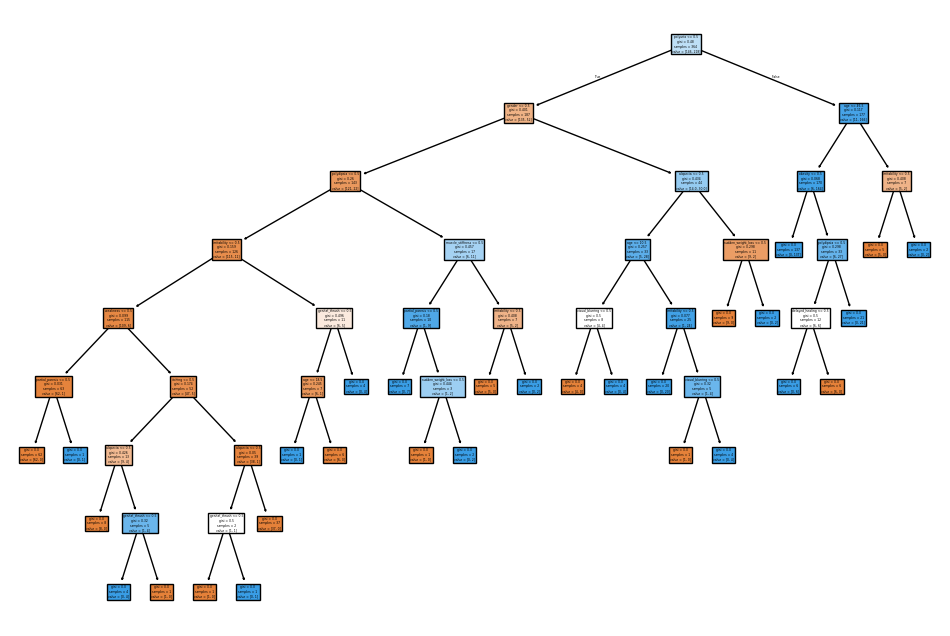

In [5]:
### 7. Visualização da Árvore de Decisão ###
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, filled=True, feature_names=sorted_headers_relevance)
plt.show()

In [6]:
# Avaliar o desempenho do modelo
recall_0 = recall_score(y_test, y_pred_best, pos_label=0)
recall_1 = recall_score(y_test, y_pred_best, pos_label=1)
accuracy = accuracy_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Recall Class 0: {recall_0:.4f}")
print(f"Recall Class 1: {recall_1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Recall Class 0: 0.9630
Recall Class 1: 0.9510
Accuracy: 0.9551
F1 Score: 0.9652


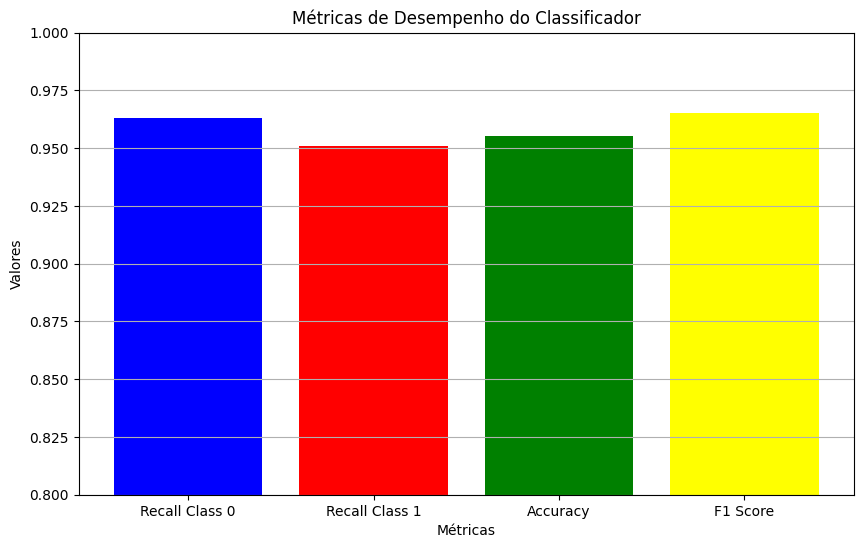

In [7]:
# Valores das métricas
metrics = {
    'Recall Class 0': recall_0,
    'Recall Class 1': recall_1,
    'Accuracy': accuracy,
    'F1 Score': f1
}

# Definir o título das barras e os valores
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'red', 'green', 'yellow'])

# Configurações do gráfico
plt.title('Métricas de Desempenho do Classificador')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.ylim(0.8, 1)  # Definir limite do eixo y já que as métricas são proporções e todas as medidas são acima de 80%
plt.grid(True, axis='y')

# Exibir o gráfico
plt.show()
